In [2]:
import scipy.io
import numpy as np
import mne
import os
import gym
from gym import Env
from gym.spaces import Discrete, Box
import numpy as np
import random

In [6]:
# download_url = [
#     "https://www.bbci.de/competition/download/competition_iv/BCICIV_2a_gdf.zip"
# ]

# for i in download_url:
#     os.system("wget --no-check-certificate -P /mnt/Data/Data/EEG_Converted "+i)

--2023-11-22 21:41:33--  https://www.bbci.de/competition/download/competition_iv/BCICIV_2a_gdf.zip
Resolving www.bbci.de (www.bbci.de)... 130.149.80.149
Connecting to www.bbci.de (www.bbci.de)|130.149.80.149|:443... connected.
  Issued certificate has expired.
HTTP request sent, awaiting response... 200 OK
Length: 439968864 (420M) [application/zip]
Saving to: ‘/mnt/Data/Data/EEG_Converted/BCICIV_2a_gdf.zip’

     0K .......... .......... .......... .......... ..........  0%  242K 29m38s
    50K .......... .......... .......... .......... ..........  0%  493K 22m5s
   100K .......... .......... .......... .......... ..........  0%  113M 14m44s
   150K .......... .......... .......... .......... ..........  0% 2.51M 11m45s
   200K .......... .......... .......... .......... ..........  0%  609K 11m45s
   250K .......... .......... .......... .......... ..........  0% 58.0M 9m49s
   300K .......... .......... .......... .......... ..........  0% 25.1M 8m27s
   350K .......... .......... .

In [2]:


from tensorflow import keras
from tensorflow.keras import layers
import time

dataset = []
labels = []
multigrasp_dataset = []
reaching_dataset = []
twist_dataset = []
for filename in os.listdir('/mnt/Data/Data/EEG_Converted'):
    if 'MI' in filename:
        filepath = os.path.join('/mnt/Data/Data/EEG_Converted', filename)
        data = scipy.io.loadmat(filepath)
        data.pop('__header__')
        data.pop('__version__')
        data.pop('__globals__')
        data.pop('mrk')
        data.pop('mnt')
        data.pop('nfo')
        data.pop('dat')
        
        data_arr = np.array(data['ch15'])
        for ch in range(16, 19):
            data_arr = np.concatenate((data_arr, data['ch'+str(ch)]), axis=1)
        for ch in range(43, 46):
            data_arr = np.concatenate((data_arr, data['ch'+str(ch)]), axis=1)
        data_arr = data_arr.T
        if 'multigrasp_MI' in filename:
            multigrasp_dataset.append(data_arr)
        if 'reaching_MI' in filename:
            reaching_dataset.append(data_arr)
        if 'twist_MI' in filename:
            twist_dataset.append(data_arr)

2023-11-22 15:14:09.798296: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-22 15:14:09.821945: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-22 15:14:09.822481: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-22 15:14:10.282477: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
def read_data(dataset):
    for i in range(len(dataset)):
        dataset[i] = np.resize(dataset[i],(7,2**23))
        d = dataset[i].astype(float)
        dataset[i] = mne.filter.filter_data(d, l_freq=0.1, h_freq=50,sfreq=2500)
        print(d.shape)
        
    dataset = np.array(dataset)
    print(dataset.shape)
    return dataset


In [4]:

#chan_names = ['Fp1','AF7','AF3','AFz','F7','F5','F3','F1','Fz','FT7','FC5','FC3','FC1','T7','C5','C3','C1','Cz','TP7','CP5','CP3','CP1','CPz','P7','P5','P3','P1','Pz','PO7','PO3','POz','Fp2','AF4','AF8','F2','F4','F6','F8','FC2','FC4','FC6','FT8','C2','C4','C6','T8','CP2','CP4','CP6','TP8','P2','P4','P6','P8','PO4','PO8','O1','Oz','O2','Iz']
chan_names = ['C5','C3','C1','Cz','C2','C4','C6']
info = mne.create_info(ch_names=chan_names, ch_types=['eeg']*7, sfreq=2500)
info.set_montage('standard_1020')
print(info)

<Info | 8 non-empty values
 bads: []
 ch_names: C5, C3, C1, Cz, C2, C4, C6
 chs: 7 EEG
 custom_ref_applied: False
 dig: 10 items (3 Cardinal, 7 EEG)
 highpass: 0.0 Hz
 lowpass: 1250.0 Hz
 meas_date: unspecified
 nchan: 7
 projs: []
 sfreq: 2500.0 Hz
>


In [5]:
%%capture

multigrasp_epochs = mne.EpochsArray(data=read_data(multigrasp_dataset), info=info)
reaching_epochs = mne.EpochsArray(data=read_data(reaching_dataset), info=info)
twist_epochs = mne.EpochsArray(data=read_data(twist_dataset), info=info)
multigrasp_epochs1 = mne.EpochsArray(data=(multigrasp_dataset), info=info)
reaching_epochs1 = mne.EpochsArray(data=(reaching_dataset), info=info)
twist_epochs1 = mne.EpochsArray(data=(twist_dataset), info=info)

________________________________  1


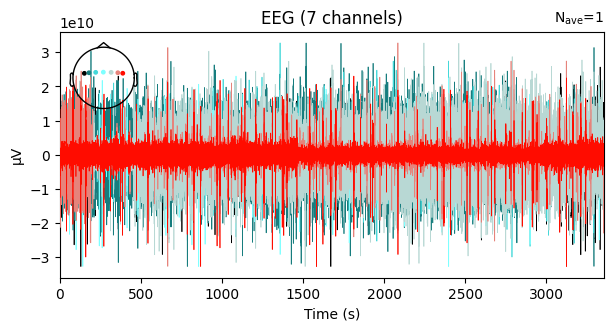

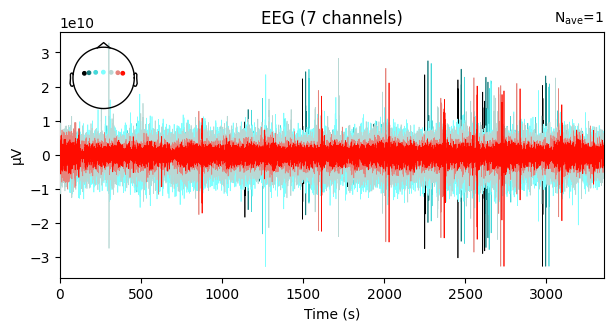

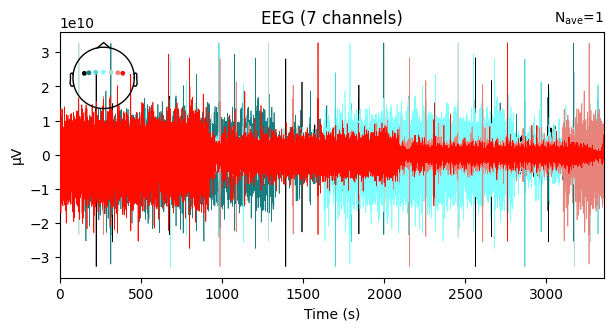

________________________________ 
________________________________  2


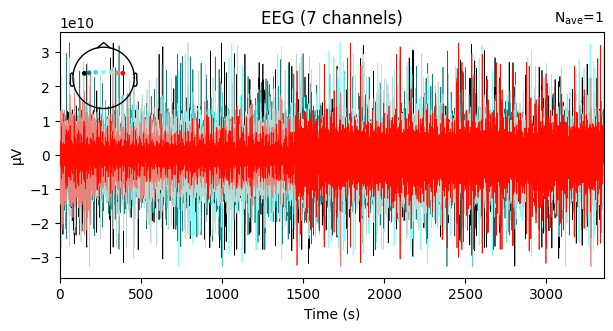

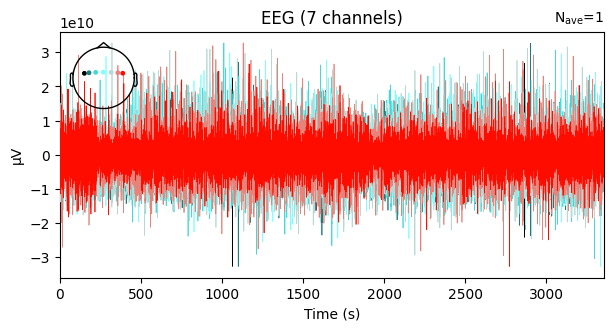

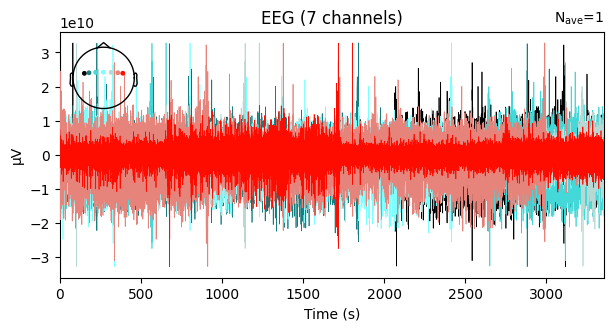

________________________________ 
________________________________  3


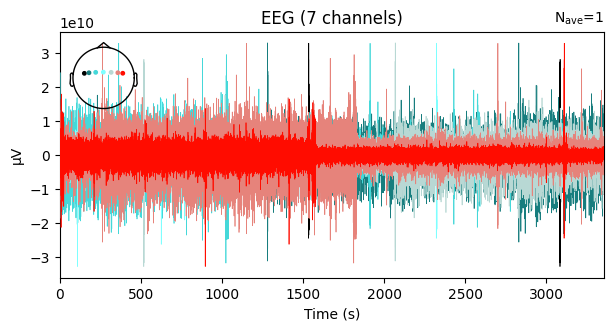

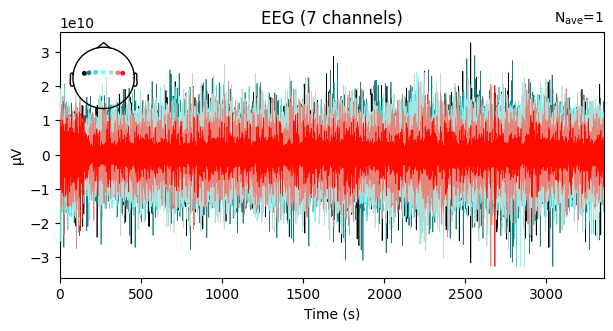

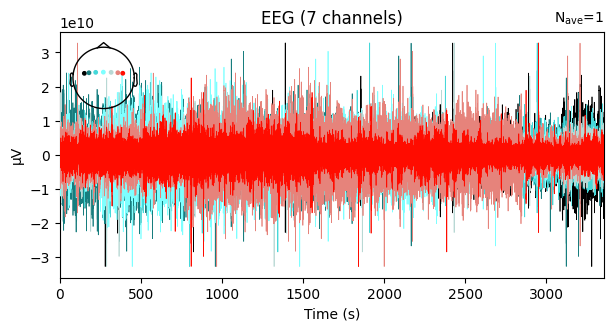

________________________________ 
________________________________  4


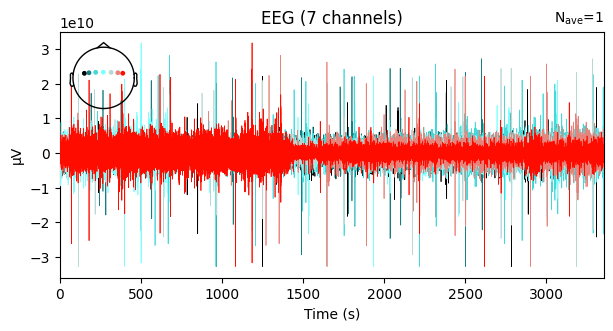

KeyboardInterrupt: 

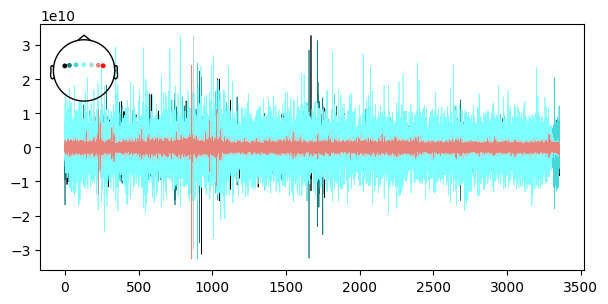

In [6]:
import matplotlib
from mne.time_frequency import tfr_morlet
%matplotlib inline
# print(len(multigrasp_dataset))
# print(len(reaching_dataset))
# print(len(twist_dataset))
# multigrasp_epochs1.average().plot_image()
# multigrasp_epochs.average().plot_image()


for i in range(1):
    print("________________________________ ",i+1)
    mevoked = mne.EvokedArray(multigrasp_epochs.get_data()[i], info, tmin=0)
    revoked = mne.EvokedArray(reaching_epochs.get_data()[i], info, tmin=0)
    tevoked = mne.EvokedArray(twist_epochs.get_data()[i], info, tmin=0)
    mevoked.plot()
    revoked.plot()
    tevoked.plot()
    
    print("________________________________ ")
    
# reaching_epochs1.average().plot_image()
# twist_epochs1.average().plot_image()
# print("___________________________________________")

# reaching_epochs.average().plot_image()
# twist_epochs.average().plot_image()

In [1]:
import scipy.io
import numpy as np
import mne
import os
import gym
from gym import Env
from gym.spaces import Discrete, Box
import numpy as np
import random
# data_list = []
# data_list.append(multigrasp_epochs.get_data())
# data_list.append(reaching_epochs.get_data())
# data_list.append(twist_epochs.get_data())
multigrasp_labels = [0 for i in range(36)] #[0 for i in range(multigrasp_epochs.get_data().shape[0])]
print(multigrasp_labels)

reaching_labels = [1 for i in range(36)]
print(reaching_labels)

twist_labels = [2 for i in range(36)]
print(twist_labels)

label_list = multigrasp_labels + reaching_labels + twist_labels


#data_array = np.vstack(data_list)
label_array = np.hstack(label_list)

print(label_array.shape)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
(108,)


In [2]:
#Functions for features
from scipy import stats
def mean(x):
    return np.mean(x,axis=-1)

def stddev(x):
    return np.std(x, axis=-1)

def peaktopeak(x):
    return np.ptp(x, axis=-1)

def variance(x):
    return np.var(x, axis=-1)

def mini(x):
    return np.min(x,axis=-1)

def maxi(x):
    return np.max(x,axis=-1)

def argmini(x):
    return np.argmin(x,axis=-1)

def argmaxi(x):
    return np.argmax(x,axis=-1)

def rms(x):
    return np.sqrt(np.mean(x**2,axis=-1))

def abs_diff_signal(x):
    return np.sum(np.abs(np.diff(x,axis=-1)),axis=-1)

def skewness(x):
    return stats.skew(x,axis=-1)

def kurtosis(x):
    return stats.kurtosis(x,axis=-1)

def concat_features(x):
    f,p=scipy.signal.welch(x, fs=2500,average='median',nperseg=68)
    mean_f = np.asarray([np.mean(f,axis=0)])
    mean_power = np.mean(p,axis=0)
    #print(mean_f.shape, mean_power.shape, peaktopeak(x).shape,rms(x).shape,abs_diff_signal(x).shape, skewness(x).shape, kurtosis(x).shape)
    return np.concatenate((mean_f, mean_power, peaktopeak(x),rms(x),abs_diff_signal(x), skewness(x), kurtosis(x)),axis=-1)

def featuresarray_load():
    features = []
    for d in data_array:
        theta = mne.filter.filter_data(d, sfreq=2500, l_freq=4, h_freq=8,verbose=False)
        alpha = mne.filter.filter_data(d, sfreq=2500, l_freq=8, h_freq=12,verbose=False)
        beta = mne.filter.filter_data(d, sfreq=2500, l_freq=12, h_freq=30,verbose=False)
        delta = mne.filter.filter_data(d, sfreq=2500, l_freq=0.5, h_freq=4,verbose=False)
        alph_ftrs = concat_features(alpha)
        beta_ftrs = concat_features(beta)
        theta_ftrs = concat_features(theta)    
        delta_ftrs = concat_features(delta)  
        print(alph_ftrs.shape)
        res = np.mean([alph_ftrs,beta_ftrs,theta_ftrs,delta_ftrs],axis=0)
        
        #print(res.shape)
        features.append(res)
        return features

#f = np.array(featuresarray_load())
#np.save("features_array.npy",allow_pickle=False,arr=f)

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold, GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
import random
import matplotlib.pyplot as plt

In [124]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input, Dense, BatchNormalization, Dropout, Conv1D, MaxPooling1D, Flatten, LSTM, LayerNormalization, Reshape
from keras.optimizers import Adam,SGD
from keras.metrics import categorical_crossentropy
from keras.backend import clear_session

features_array = np.load(file="features_array.npy")
# feature_names = ['Mean Freq'] + [f'Mean Power {i+1}' for i in range(35)] + \
#                 [f'Peak-to-Peak - Channel {i+1}' for i in range(7)] + \
#                 [f'RMS - Channel {i+1}' for i in range(7)] + \
#                 [f'Abs Diff - Channel {i+1}' for i in range(7)] + \
#                 [f'Skewness - Channel {i+1}' for i in range(7)] + \
#                 [f'Kurtosis - Channel {i+1}' for i in range(7)]

# for i in [1,37,107]:
#     features=features_array[i]
#     print(features.shape,label_array[i])
    
#     plt.figure(figsize=(20, 10))
#     plt.bar(range(len(features)), features)
#     plt.xticks(ticks=range(len(features)), labels=feature_names, rotation=90)
#     plt.title("Feature Values")
#     plt.xlabel("Feature")
#     plt.ylabel("Value")
#     plt.ylim(-100,max(features))
#     plt.yscale("symlog",linthresh=1e-10)
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()
#     plt.close()
#     print("Plot",i+1,"has been plotted")


scaler2 = StandardScaler()
features_array2 = features_array[:108]
label_array2 = label_array[:108]
features_array45 = scaler2.fit_transform(features_array)

# for i in [1,37,107]:
#     features=features_array45[i]
#     print(features.shape,label_array[i])
    
#     plt.figure(figsize=(20, 10))
#     plt.bar(range(len(features)), features)
#     plt.xticks(ticks=range(len(features)), labels=feature_names, rotation=90)
#     plt.title("Feature Values")
#     plt.xlabel("Feature")
#     plt.ylabel("Value")
#     plt.ylim(-100,max(features))
#     plt.yscale("symlog",linthresh=1e-10)
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()
#     plt.close()
#     print("Plot",i+1,"has been plotted")

X_train, X_test, y_train, y_test = train_test_split(features_array2, label_array2, train_size=(.75), random_state=None, shuffle=True)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train2  = X_train.reshape((X_train.shape[0],71,1))
X_test2  = X_test.reshape((X_test.shape[0],71,1))
clear_session()
model = Sequential([
    #Reshape((71, 1), input_shape=(1,71)),
    Conv1D(8, kernel_size=2, activation='relu',input_shape=(71,1)),  
    MaxPooling1D(pool_size=2),
    BatchNormalization(),
    Dropout(0.1),
    Conv1D(16, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    BatchNormalization(),
    LSTM(64, activation='tanh', return_sequences=True),
    #LSTM(64, activation='tanh'),
    BatchNormalization(),
    Dropout(0.1),
    Flatten(),
    Dense(units=128, activation='tanh'),
    BatchNormalization(),
    Dense(units=256, activation='tanh'),
    BatchNormalization(),
    Dropout(0.8),
    Dense(3, activation='softmax')
])

model.compile(tf.optimizers.legacy.SGD(learning_rate=0.025),loss="sparse_categorical_crossentropy",metrics=['accuracy'])
#model.summary()
model.fit(X_train2,y_train,epochs=100)
_,accuracy = model.evaluate(X_test2,y_test)
print(accuracy)
# res = model.predict(features_array)
# count = 0
# for i in res:
#     print("Prediction: ", np.argmax(i)," real: ",label_array[count])
#     count+=1

# _, accuracy = model.evaluate(features_array,label_array)
# print('Accuracy: %.2f' % (accuracy*100))

(81, 71)
(27, 71)
(81,)
(27,)
Train on 81 samples
Epoch 1/100


2023-11-24 13:46:54.168236: W tensorflow/c/c_api.cc:304] Operation '{name:'count/Assign' id:701 op device:{requested: '', assigned: ''} def:{{{node count/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](count, count/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


81/81 [==============================] - 0s 3ms/sample - loss: 2.7873 - accuracy: 0.3210
Epoch 2/100
81/81 [==============================] - 0s 224us/sample - loss: 2.5302 - accuracy: 0.4691
Epoch 3/100
81/81 [==============================] - 0s 214us/sample - loss: 2.2815 - accuracy: 0.4321
Epoch 4/100
81/81 [==============================] - 0s 215us/sample - loss: 2.1480 - accuracy: 0.4938
Epoch 5/100
81/81 [==============================] - 0s 210us/sample - loss: 2.1853 - accuracy: 0.4691
Epoch 6/100
81/81 [==============================] - 0s 214us/sample - loss: 1.7191 - accuracy: 0.5062
Epoch 7/100
81/81 [==============================] - 0s 212us/sample - loss: 1.6693 - accuracy: 0.5185
Epoch 8/100
81/81 [==============================] - 0s 217us/sample - loss: 1.5182 - accuracy: 0.5062
Epoch 9/100
81/81 [==============================] - 0s 210us/sample - loss: 1.0860 - accuracy: 0.7160
Epoch 10/100
81/81 [==============================] - 0s 200us/sample - loss: 1.6146 - 

/home/eeshan/.local/lib/python3.8/site-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2023-11-24 13:46:56.341229: W tensorflow/c/c_api.cc:304] Operation '{name:'loss/mul' id:749 op device:{requested: '', assigned: ''} def:{{{node loss/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss/mul/x, loss/dense_2_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


In [125]:
class Plasticity(gym.Env):
    def __init__(self, images_per_episode=1, dataset=(X_train, y_train), random=True):
        super().__init__()

        self.action_space = gym.spaces.Discrete(3)
        self.observation_space = gym.spaces.Box(low=0, high=1,
                                                shape=(71,),
                                                dtype=np.float32)
        self.images_per_episode = images_per_episode
        self.step_count = 0

        self.x, self.y = dataset
        self.random = random
        self.dataset_idx = 0

    def step(self, action):

        done = False
        reward = int(action == self.expected_action)

        obs = self._next_obs()

        self.step_count += 1
        if self.step_count >= self.images_per_episode:
            done = True

        return obs, reward, done, {}

    def reset(self):
        self.step_count = 0

        obs = self._next_obs()

        return obs

    def _next_obs(self):
        if self.random:
            next_obs_idx = random.randint(0, len(self.x) - 1)
            self.expected_action = int(self.y[next_obs_idx])
            obs = self.x[next_obs_idx]

        else:
            obs = self.x[self.dataset_idx]
            self.expected_action = int(self.y[self.dataset_idx])

            self.dataset_idx += 1
            if self.dataset_idx >= len(self.x):
                raise StopIteration()

        return obs

In [126]:
env = Plasticity()

In [127]:
env.observation_space.sample()
env.observation_space.sample().shape

(71,)

In [128]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Input
from tensorflow.keras.optimizers import Adam
tf.compat.v1.experimental.output_all_intermediates(True)

In [129]:
states = env.observation_space.shape
actions = env.action_space.n
print(states,actions)

(71,) 3


In [130]:
def build_model(states, actions):
    clear_session()
    # model = Sequential([
    #     #Input(shape=(71,1)),
    #     Reshape((71, 1), input_shape=(1,71)),
    #     Conv1D(16, kernel_size=5, activation='relu',input_shape=(71,1)),
    #     MaxPooling1D(pool_size=2),
    #     BatchNormalization(),
    #     Conv1D(32, kernel_size=3, activation='relu'),
    #     MaxPooling1D(pool_size=2),
    #     BatchNormalization(),
    #     LSTM(64, activation='tanh', return_sequences=True),
    #     BatchNormalization(),
    #     Dropout(0.1),
    #     Flatten(),
    #     Dense(units=128, activation='linear'),
    #     BatchNormalization(),
    #     Dropout(0.1),
    #     Dense(units=256, activation='linear'),
    #     BatchNormalization(),
    #     Dropout(0.4),
    #     Dense(actions, activation='softmax')
    # ])
    # model = Sequential([
    #     #Input(shape=(71,1)),
    #     Reshape((71, 1), input_shape=(1,71)),
    #     Conv1D(32, kernel_size=3, activation='relu'),  
    #     MaxPooling1D(pool_size=2),
    #     BatchNormalization(),
    #     Conv1D(64, kernel_size=3, activation='relu'),
    #     MaxPooling1D(pool_size=2),
    #     BatchNormalization(),
    #     LSTM(64, activation='tanh', return_sequences=True),
    #     LSTM(64, activation='tanh'),
    #     BatchNormalization(),
    #     Flatten(),
    #     Dense(units=120, activation='tanh'),
    #     BatchNormalization(),
    #     Dense(units=100, activation='tanh'),
    #     BatchNormalization(),
    #     Dropout(0.8),
    #     Dense(actions, activation='softmax')
    # ])
    model = Sequential([
        #Input(shape=(71,1)),
        Reshape((71, 1), input_shape=(1,71)),
        Conv1D(8, kernel_size=3, activation='relu',input_shape=(71,1)),
        MaxPooling1D(pool_size=2),
        BatchNormalization(),
        Dropout(0.2),
        Conv1D(16, kernel_size=3, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        LSTM(128, activation='tanh', return_sequences=True),
        BatchNormalization(),
        Dropout(0.2),
        Flatten(),
        Dense(units=100, activation='tanh'),
        BatchNormalization(),
        Dropout(0.8),
        Dense(actions, activation='softmax')
    ])
    # model = Sequential([
    #     Dense(128, activation="relu", input_shape=(1,) + env.observation_space.shape),
    #     LSTM(64, return_sequences=True),
    #     Flatten(),
    #     Dense(256, activation='relu'),
    #     BatchNormalization(),
    #     Dense(512, activation='relu'),
    #     BatchNormalization(),
    #     Dense(256, activation='tanh'),
    #     BatchNormalization(),
    #     Dense(128, activation='tanh'),
    #     BatchNormalization(),
    #     Dropout(0.4),
    #     Dense(actions, activation='softmax')
    # ])
    # model = Sequential()
    # model.add(Dense(128, activation="relu", input_shape=(1,) + env.observation_space.shape))
    # model.add(Flatten())
    # model.add(Dense(64, activation="relu"))
    # model.add(Dense(actions, activation="linear"))
    return model

In [131]:
import tensorflow as tf
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory
from keras import __version__
model = build_model(states, actions)
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 71, 1)             0         
                                                                 
 conv1d (Conv1D)             (None, 69, 8)             32        
                                                                 
 max_pooling1d (MaxPooling1  (None, 34, 8)             0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 34, 8)             32        
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 34, 8)             0         
                                                                 
 conv1d_1 (Conv1D)           (None, 32, 16)            4

In [132]:
def build_agent(model, actions):
    policy = EpsGreedyQPolicy(eps=0.1)
    memory = SequentialMemory(limit=30000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy,
                  nb_actions=actions, nb_steps_warmup=100, target_model_update=1e-3)
    return dqn, policy

In [133]:
dqn, policy = build_agent(model, actions)
dqn.compile(tf.keras.optimizers.legacy.Adam(learning_rate=0.00025), metrics=['mse'])

2023-11-24 13:46:57.134195: W tensorflow/c/c_api.cc:304] Operation '{name:'batch_normalization_3_1/beta/Assign' id:1173 op device:{requested: '', assigned: ''} def:{{{node batch_normalization_3_1/beta/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](batch_normalization_3_1/beta, batch_normalization_3_1/beta/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


In [134]:
from rl.callbacks import Callback

class LossHistory(Callback):
    def __init__(self):
        self.losses = []

    def on_step_end(self, step, logs={}):
        self.losses.append(logs['metrics'][0])  

class LossHistory2(Callback):
    def __init__(self):
        self.losses = []

    def on_step_end(self, step, logs={}):
        self.losses.append(logs['metrics'][1]) 

class RewardHistory(Callback):
    def on_train_begin(self, logs={}):
        self.rewards = []

    def on_episode_end(self, episode, logs={}):
        self.rewards.append(logs['episode_reward'])

loss_history = LossHistory()
loss_history2 = LossHistory2()
reward_history = RewardHistory()

dqn.fit(env, nb_steps=20000, callbacks=[loss_history,loss_history2,reward_history], verbose=1)

Training for 20000 steps ...
Interval 1 (0 steps performed)
    1/10000 [..............................] - ETA: 29:51 - reward: 0.0000e+00

/home/eeshan/.local/lib/python3.8/site-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2023-11-24 13:46:57.437029: W tensorflow/c/c_api.cc:304] Operation '{name:'dense_1/Softmax' id:627 op device:{requested: '', assigned: ''} def:{{{node dense_1/Softmax}} = Softmax[T=DT_FLOAT, _has_manual_control_dependencies=true](dense_1/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-11-24 13:46:57.496631: W tensorflow/c/c_api.cc:304] Operation '{name:'total_3/Assign' id:1662 op device:{requested: '', assigned: ''} def:{{{node total_3/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=fal

   89/10000 [..............................] - ETA: 34s - reward: 0.2921

2023-11-24 13:46:57.960767: W tensorflow/c/c_api.cc:304] Operation '{name:'dense_1_1/Softmax' id:1251 op device:{requested: '', assigned: ''} def:{{{node dense_1_1/Softmax}} = Softmax[T=DT_FLOAT, _has_manual_control_dependencies=true](dense_1_1/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-11-24 13:46:58.467143: W tensorflow/c/c_api.cc:304] Operation '{name:'batch_normalization_3/cond_3/Identity' id:580 op device:{requested: '', assigned: ''} def:{{{node batch_normalization_3/cond_3/Identity}} = Identity[T=DT_FLOAT, _has_manual_control_dependencies=true](batch_normalization_3/cond_3)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-11-24 13:4

10000/10000 [==============================] - 479s 48ms/step - reward: 0.9125
10000 episodes - episode_reward: 0.912 [0.000, 1.000] - loss: 0.010 - mse: 0.056 - mean_q: 0.980

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 486s 49ms/step - reward: 0.9332
done, took 965.085 seconds


[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.1139812, 0.11149118, 0.10979131, 0.10814827, 0.107159145, 0.10645193, 0.104824945, 0.103557765, 0.10233735, 0.1017019, 0.10091662, 0.10135379, 0.10133666, 0.10226276, 0.101074755, 0.10172489, 0.10135197, 0.10021946, 0.09920052, 0.09809289, 0.098734915, 0.09814783, 0.09751365, 0.09732952, 0.096738815, 0.09482369, 0.09368965, 0.09393269, 0.09250739, 0.09226984, 0.09170909, 0.0903777, 0.08939466, 0.08957467, 0.08912065, 0.08866277, 0.08786425, 0.086656645, 0.08617759, 0.08666586, 0.08556717

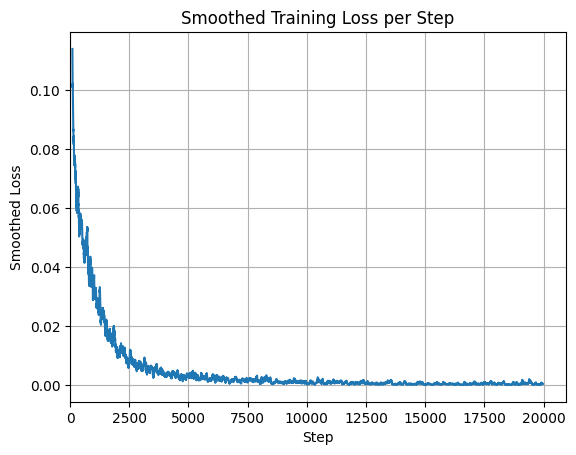

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.24287885, 0.24223985, 0.24146518, 0.24034667, 0.23918095, 0.23835172, 0.237142, 0.23673305, 0.23504715, 0.23413563, 0.23226008, 0.23167416, 0.23111258, 0.23065054, 0.23000254, 0.22891274, 0.22705023, 0.22639637, 0.22576854, 0.22616947, 0.22597948, 0.22465672, 0.22487903, 0.2239575, 0.22402756, 0.22293608, 0.22152503, 0.22095333, 0.22102152, 0.22064473, 0.22005706, 0.21987844, 0.21888751, 0.21849354, 0.21822034, 0.2174716, 0.2169365, 0.21715075, 0.21777824, 0.21867067, 0.21845104, 0.21838

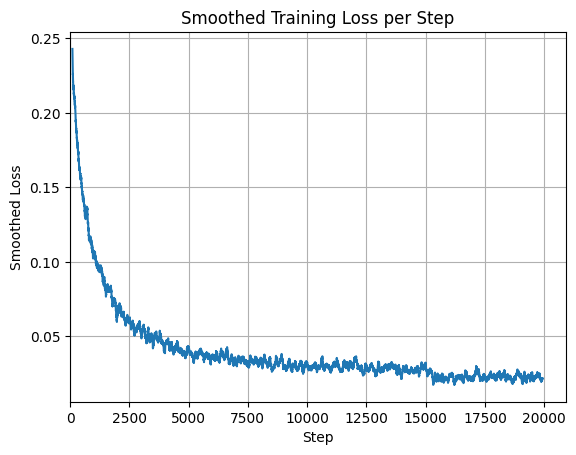

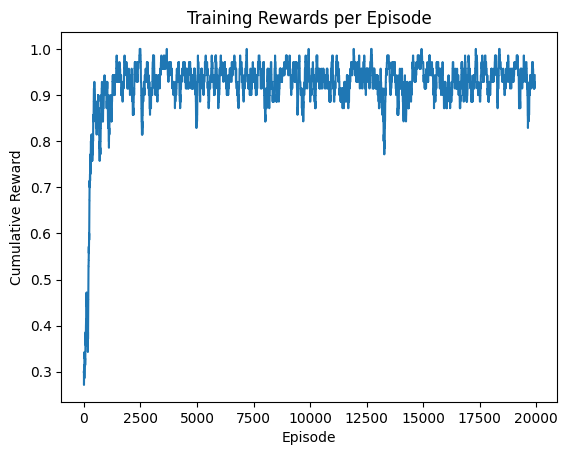

___________________________________________________________________________________________________________________________

Validation done... 17 53
Accuracy: 32.08%


In [137]:
def moving_average(data, window_size):
    return [np.mean(data[i:i+window_size]) for i in range(len(data) - window_size + 1)]
losses = loss_history.losses
losses2 = loss_history2.losses
smoothed_losses = moving_average(losses, window_size=50)  
print(smoothed_losses)
plt.plot(smoothed_losses)
plt.title('Smoothed Training Loss per Step')
plt.xlabel('Step')
plt.xlim(left=0)
plt.ylabel('Smoothed Loss')
plt.grid(True)
plt.show()

smoothed_losses2 = moving_average(losses2, window_size=70)  
print(smoothed_losses2)
plt.plot(smoothed_losses2)
plt.title('Smoothed Training Loss per Step')
plt.xlabel('Step')
plt.xlim(left=0)
plt.ylabel('Smoothed Loss')
plt.grid(True)
plt.show()

plt.plot(moving_average(reward_history.rewards, window_size=70))
plt.title('Training Rewards per Episode')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.show()

print("___________________________________________________________________________________________________________________________")
#Test RL on everything
# env.dataset=(features_array,label_array)
# for i in range(3):
#     scores = dqn.test(env, nb_episodes=len(features_array)*2, visualize=False,verbose=0)
#     print(dqn.metrics_names)
#     # plt.plot(scores.history['episode_reward'])
#     # plt.title('Testing Rewards per Episode')
#     # plt.xlabel('Episode')
#     # plt.ylabel('Cumulative Reward')
#     # plt.show()
#     print(np.mean(scores.history['episode_reward'])*100,'%')

# env.dataset=(X_test,y_test)
# for i in range(3):
#     scores = dqn.test(env, nb_episodes=len(X_test)*2, visualize=False,verbose=0)
#     print(np.mean(scores.history['episode_reward'])*100,'%')
def dqn_eval(dqn_agent):
    attempts, correct = 0, 0

    env = Plasticity(dataset=(features_array2,label_array2), random=False)

    try:
        while True:
            obs = env.reset()
            done = False
            while not done:
                # Reshape the observation to match the input shape of the model
                obs_reshaped = np.reshape(obs, (1,) + obs.shape)
                # Get Q-values from the model
                q_values = dqn_agent.compute_q_values(obs_reshaped)

                # Select the action with the highest Q-value
                action = np.argmax(q_values)
                #print('action: ', 7+action, " - ", dataset[1][attempts])
                # Take the step using the selected action
                obs, rew, done, _ = env.step(action)

                attempts += 1
                if rew > 0:
                    correct += 1

    except StopIteration:
        print()
        print('Validation done...',correct,attempts)
        print('Accuracy: {:.2f}%'.format((float(correct) / attempts) * 100))

# Call the function with the DQN agent
dqn_eval(dqn)
